In [13]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt




In [90]:
######读取数据
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [91]:
print ("Dimension of train data {}".format(train.shape))
print ("Dimension of test data {}".format(test.shape))

Dimension of train data (891, 12)
Dimension of test data (418, 11)


In [92]:
train.tail()
test.head()
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


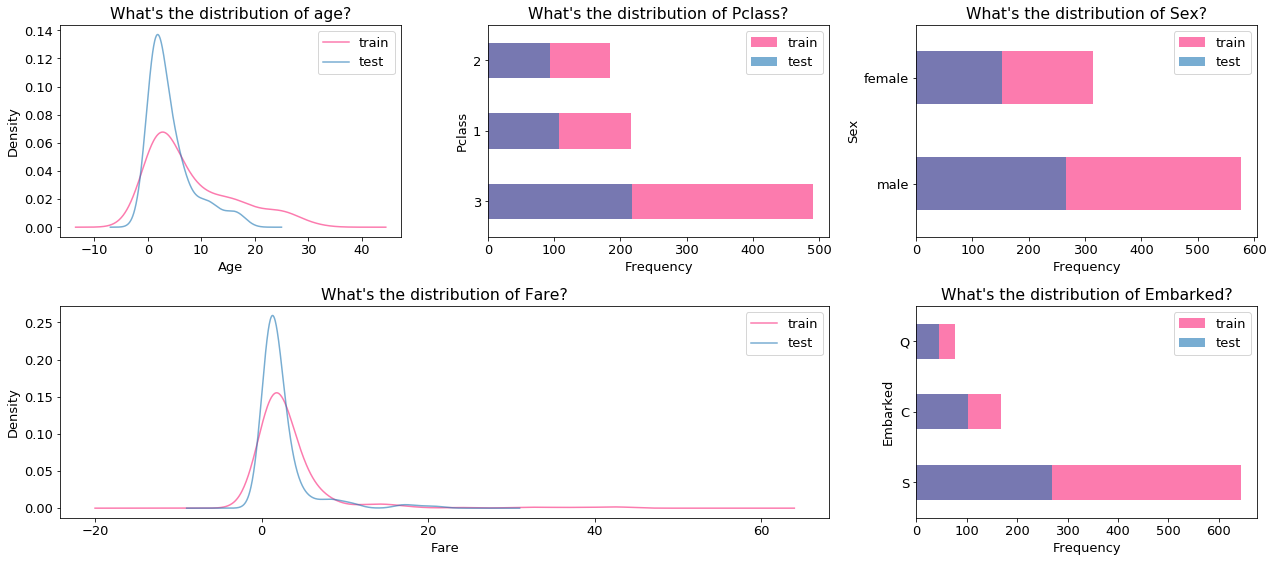

In [93]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3),(0,0))
train.Age.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Age.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?")
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
train.Pclass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Pclass.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
train.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Sex.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
train.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
train.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Embarked.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

plt.show()
              

In [94]:
print(train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


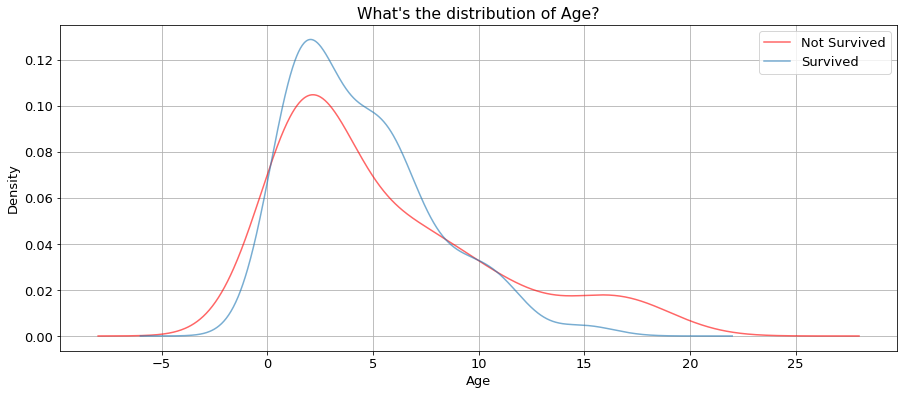

In [95]:
fig = plt.figure(figsize=(15,6))
train[train.Survived==0].Age.value_counts().plot(kind='density', color='red', label='Not Survived', alpha=alpha)
train[train.Survived==1].Age.value_counts().plot(kind='density', label='Survived', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()
plt.show()

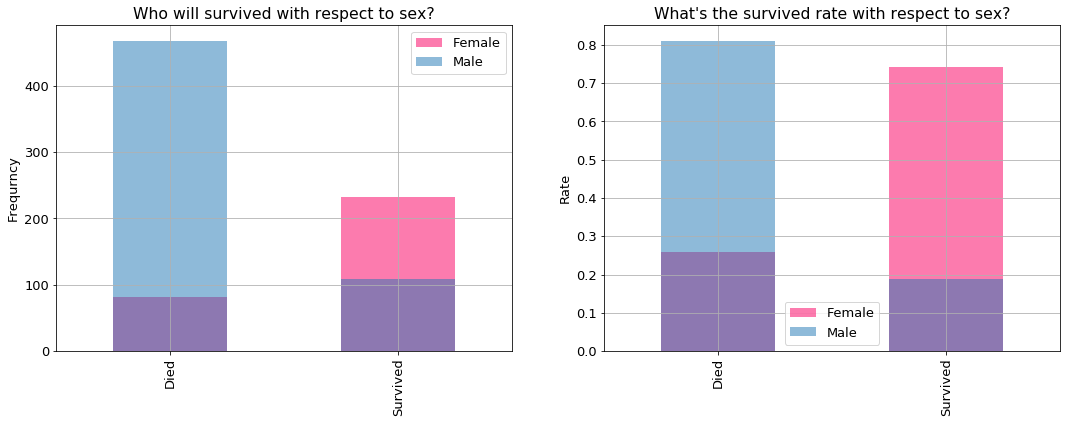

In [96]:
df_male = train[train.Sex=='male'].Survived.value_counts().sort_index()
df_female = train[train.Sex=='female'].Survived.value_counts().sort_index()
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
df_female.plot(kind='bar', color='#FA2379', label='Female', alpha=alpha)
df_male.plot(kind='bar', label='Male', alpha=alpha-0.1)
ax1.set_ylabel('Frequrncy')
ax1.set_xticklabels(['Died', 'Survived'])
ax1.set_title("Who will survived with respect to sex?" )
plt.legend(loc='best')
plt.grid()

ax2 = plt.subplot2grid((1,2), (0,1))
(df_female/train[train.Sex=='female'].shape[0]).plot(kind='bar', color='#FA2379', label='Female', alpha=alpha)
(df_male/train[train.Sex=='male'].shape[0]).plot(kind='bar', label='Male', alpha=alpha-0.1)
ax2.set_ylabel('Rate')
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("What's the survived rate with respect to sex?" )
plt.legend(loc='best')
plt.grid()
plt.show()

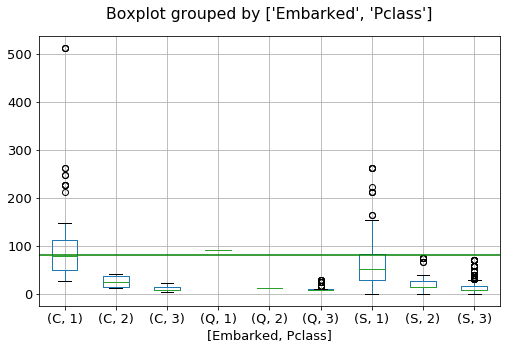

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


In [97]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax = train.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.axhline(y=80, color='green')
ax.set_title('', y=1.1)
plt.show()

train[train.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

In [98]:
_ = train.set_value(train.Embarked.isnull(), 'Embarked','C')

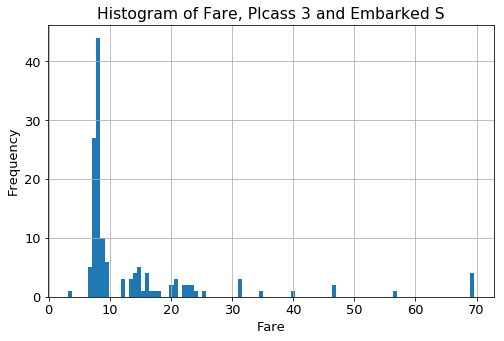

,Pclass,Fare,Embarked
152,3,NaN,S


In [99]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.hist(bins=100, ax=ax)
test[test.Fare.isnull()][['Pclass','Fare','Embarked']]
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')
plt.show()
test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]

In [100]:
print ("The top 5 most common value of Fare")
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.value_counts().head()

The top 5 most common value of Fare


8.0500    17
7.8958    10
7.7750    10
8.6625     8
7.8542     8
Name: Fare, dtype: int64

In [101]:
_ = test.set_value(test.Fare.isnull(), 'Fare', 8.05)

In [102]:
full = pd.concat([train, test], ignore_index=True)
_ = full.set_value(full.Cabin.isnull(), 'Cabin', 'U0')

In [103]:
import re
names = full.Name.map(lambda x: len(re.split(' ', x)))
_ = full.set_value(full.index, 'Names', names)
del names

In [104]:
title = full.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])
title[title=='Mme'] = 'Mrs'
title[title.isin(['Ms','Mlle'])] = 'Miss'
title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
_ = full.set_value(full.index, 'Title', title)
del title

In [105]:
deck = full[~full.Cabin.isnull()].Cabin.map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
deck = pd.factorize(deck)[0]
_ = full.set_value(full.index, 'Deck', deck)
del deck

In [106]:
checker = re.compile("([0-9]+)")
def roomNum(x):
    nums = checker.search(x)
    if nums:
        return int(nums.group())+1
    else:
        return 1
rooms = full.Cabin.map(roomNum)
_ = full.set_value(full.index, 'Room', rooms)
del checker, roomNum
full['Room'] = full.Room/full.Room.sum()

In [107]:
full['Group_num'] = full.Parch + full.SibSp + 1

In [108]:
full['Group_size'] = pd.Series('M', index=full.index)
_ = full.set_value(full.Group_num>4, 'Group_size', 'L')
_ = full.set_value(full.Group_num==1, 'Group_size', 'S')

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full['NorFare'] = pd.Series(scaler.fit_transform(full.Fare.reshape(-1,1)).reshape(-1), index=full.index)

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [110]:
def setValue(col):
    _ = train.set_value(train.index, col, full[:891][col].values)
    _ = test.set_value(test.index, col, full[891:][col].values)

for col in ['Deck', 'Room', 'Group_size', 'Group_num', 'Names', 'Title']:
    setValue(col)

## Predict Age

In [169]:
full.drop(labels=['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket', 'Fare'], axis=1, inplace=True)
full = pd.get_dummies(full, columns=['Embarked', 'Sex', 'Title', 'Group_size'])

ValueError: labels ['PassengerId' 'Name' 'Cabin' 'Survived' 'Ticket' 'Fare'] not contained in axis

In [112]:
from sklearn.model_selection import train_test_split
X = full[~full.Age.isnull()].drop('Age', axis=1)
y = full[~full.Age.isnull()].Age
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [154]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def get_model(estimator, parameters, X_train, y_train, scoring):
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [117]:
import xgboost as xgb

XGB = xgb.XGBRegressor(max_depth=4, seed= 42)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)
parameters = {'reg_alpha':np.linspace(0.1,1.0,5), 'reg_lambda': np.linspace(1.0,3.0,5)}
reg_xgb = get_model(XGB, parameters, X_train, y_train, scoring)
print (reg_xgb)

/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0.55000000000000004,
       reg_lambda=3.0, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)


In [118]:
print ("Mean absolute error of test data: {}".format(mean_absolute_error(y_test, reg_xgb.predict(X_test))))

Mean absolute error of test data: 7.728310826789332


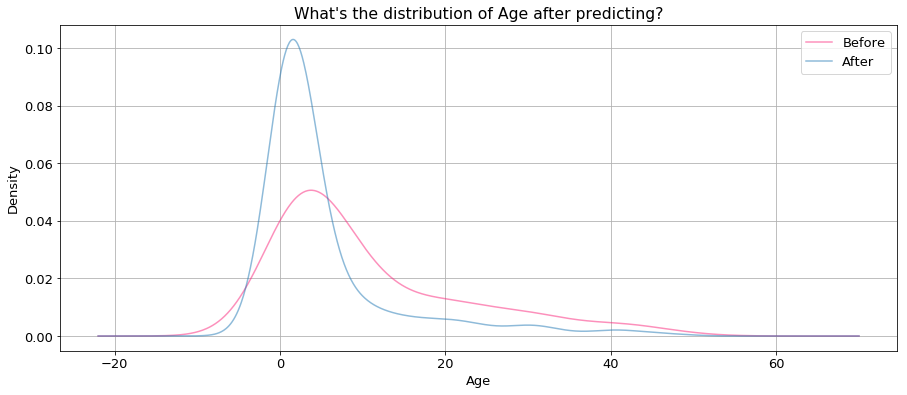

In [119]:
fig = plt.figure(figsize=(15, 6))
alpha = 0.5
full.Age.value_counts().plot(kind='density', color='#FA2379', label='Before', alpha=alpha)

pred = reg_xgb.predict(full[full.Age.isnull()].drop('Age', axis=1))
full.set_value(full.Age.isnull(), 'Age', pred)

full.Age.value_counts().plot(kind='density', label='After', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age after predicting?" )
plt.legend(loc='best')
plt.grid()
plt.show()

In [120]:
full['NorAge'] = pd.Series(scaler.fit_transform(full.Age.reshape(-1,1)).reshape(-1), index=full.index)
full['NorNames'] = pd.Series(scaler.fit_transform(full.Names.reshape(-1,1)).reshape(-1), index=full.index)
full['Group_num'] = pd.Series(scaler.fit_transform(full.Group_num.reshape(-1,1)).reshape(-1), index=full.index)

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [123]:
for col in ['NorAge', 'NorFare', 'NorNames', 'Group_num']:
    setValue(col)

In [125]:
train.Sex = np.where(train.Sex=='female',0,1)
test.Sex = np.where(test.Sex=='female',0,1)

In [126]:
train = pd.get_dummies(train, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test = pd.get_dummies(test, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test['Title_Sir'] = pd.Series(0, index=test.index)

### Convert values of Embarked and Ticket into dummy variables

In [173]:
train.drop(labels=['PassengerId', 'Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
test.drop(labels=['Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)

ValueError: labels ['PassengerId' 'Name' 'Names' 'Cabin' 'Ticket' 'Age' 'Fare'] not contained in axis

# Build Model

In [174]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [176]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(estimator, X, y, title):
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:,1])
    
    roc_auc = auc(fpr, tpr)
    print('ROC AUC: %.2f' % roc_auc)
    
    #Plot of a ROC curve for a specific class
    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(title))
    plt.legend(loc="lower right")
    plt.show()

In [177]:
X = train.drop(['Survived'],axis=1)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [178]:
from sklearn.metrics import accuracy_score
scoring = make_scorer(accuracy_score, greater_is_better=True)

# KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights='uniform')
parameters = {'n_neighbors':[3,4,5], 'p':[1,2]}
clf_knn = get_model(KNN, parameters, X_train, y_train, scoring)

0.816143497758
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')


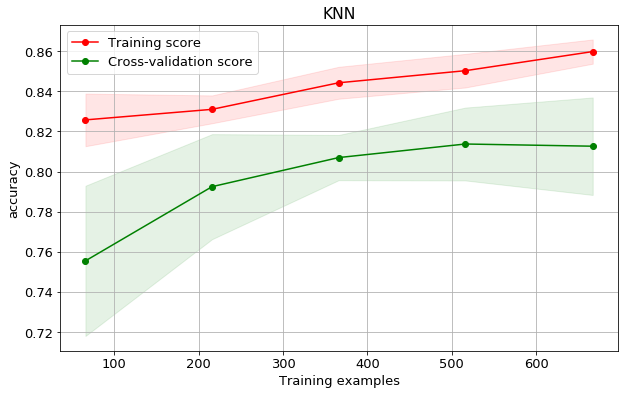

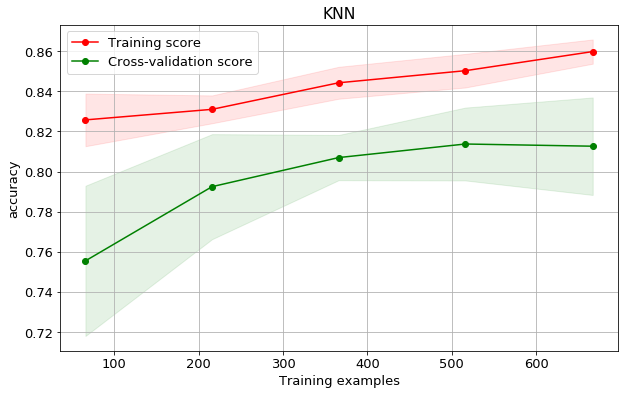

In [181]:
print (accuracy_score(y_test, clf_knn.predict(X_test)))
print (clf_knn)
plt = plot_learning_curve(clf_knn, 'KNN', X, y, cv=4);
plt.show()

In [183]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc1 = get_model(rfc,parameters, X_train, y_train, scoring)

0.829596412556
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)


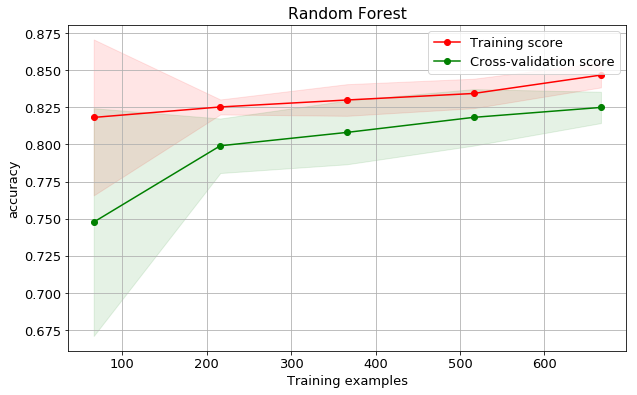

In [186]:
print (accuracy_score(y_test, clf_rfc1.predict(X_test)))
print (clf_rfc1)
plt = plot_learning_curve(clf_rfc1, 'Random Forest', X, y, cv=4);
plt.show()

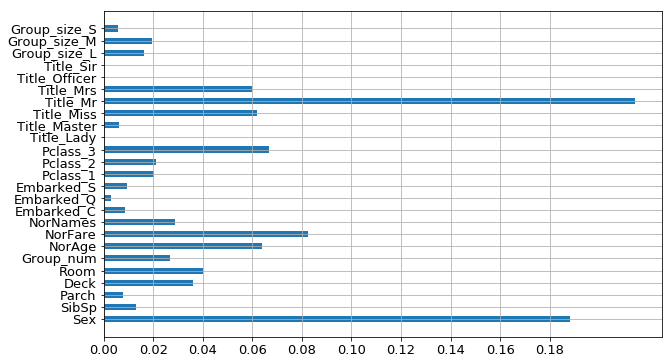

In [187]:
plt.figure(figsize=(10,6))
plt.barh(np.arange(X_train.columns.shape[0]), clf_rfc1.feature_importances_, 0.5)
plt.yticks(np.arange(X_train.columns.shape[0]), X_train.columns)
plt.grid()
plt.xticks(np.arange(0,0.2,0.02));
plt.show()


In [189]:
cols = X_train.columns[clf_rfc1.feature_importances_ >= 0.016]

In [190]:
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc2 = get_model(rfc, parameters, X_train[cols], y_train, scoring)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)
0.834080717489


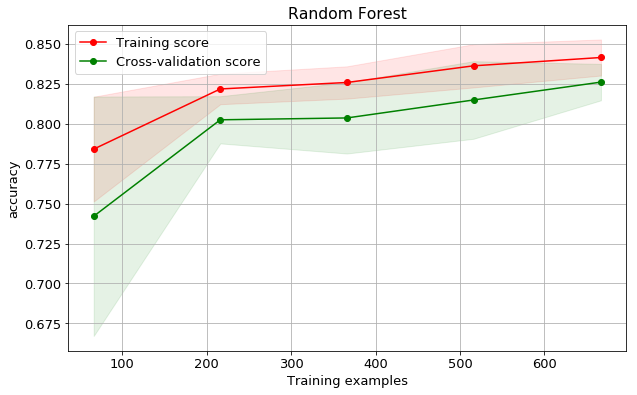

In [193]:
print (clf_rfc2)
print (accuracy_score(y_test, clf_rfc2.predict(X_test[cols])))
plt = plot_learning_curve(clf_rfc2, 'Random Forest', X[cols], y, cv=4);
plt.show()

## Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.5]}
clf_lg1 = get_model(lg, parameters, X_train, y_train, scoring)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.811659192825


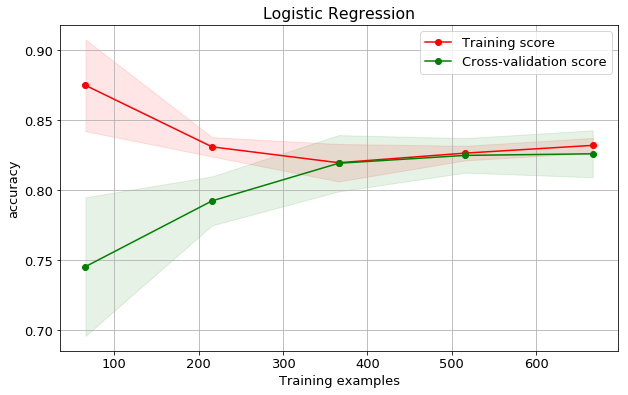

In [197]:
print(clf_lg1)
print(accuracy_score(y_test, clf_lg1.predict(X_test)))
plt = plot_learning_curve(clf_lg1, 'Logistic Regression', X, y, cv=4);
plt.show()

## SVC

In [198]:
from sklearn.svm import SVC
svc = SVC(random_state=42, kernel='poly', probability=True)
parameters = {'C':[35], 'gamma':[0.0055],'coef0': [0.1],
              'degree':[2]}
clf_svc = get_model(svc,parameters,X_train,y_train,scoring)

SVC(C=35, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape=None, degree=2, gamma=0.0055, kernel='poly',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.838565022422


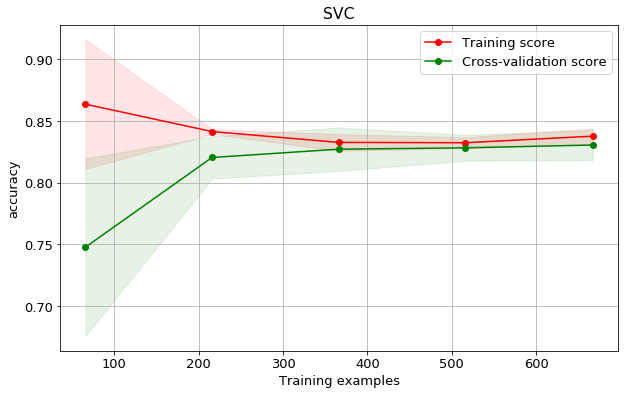

In [202]:
print (clf_svc)
print (accuracy_score(y_test, clf_svc.predict(X_test)))
plt = plot_learning_curve(clf_svc, 'SVC', X, y, cv=4);
plt.show()

## XGBoost

In [203]:
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1],
              'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb, parameters, X_train, y_train, scoring)

0.820627802691
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)


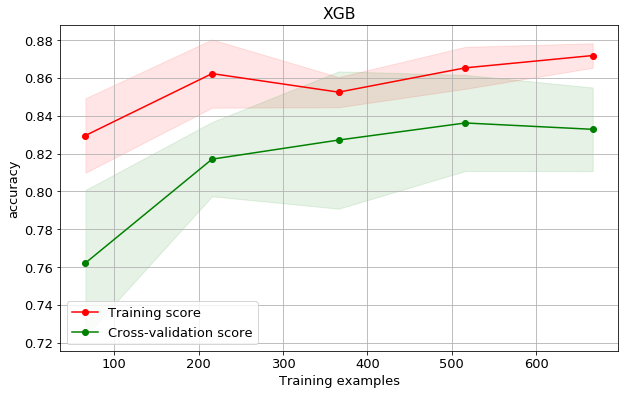

In [204]:
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)
plt = plot_learning_curve(clf_xgb1, 'XGB', X, y, cv=4)
plt.show()

## Adaboost

In [218]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42, algorithm='SAMME',learning_rate=0.2)
parameters = {'n_estimators':[200]}
clf_ada = get_model(ada, parameters, X_train, y_train, scoring)

0.811659192825
AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.2,
          n_estimators=200, random_state=42)


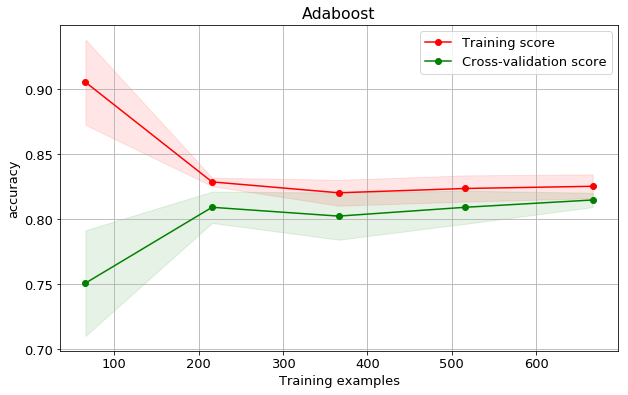

In [219]:
print(accuracy_score(y_test, clf_ada.predict(X_test)))
print(clf_ada)
plt = plot_learning_curve(clf_ada, 'Adaboost', X, y, cv=4)
plt.show()

## Ensemble

In [232]:
from sklearn.ensemble import VotingClassifier
clf_vc = VotingClassifier(estimators=[ ('xgb1', clf_xgb1), ('lg1', clf_lg1), ('svc', clf_svc), 
                                      ('rfc1', clf_rfc1),('rfc2', clf_rfc2), ('knn', clf_knn),('ada', clf_ada)], 
                          voting='hard', weights=[4,1,4,1,1,2,1])
clf_vc = clf_vc.fit(X_train, y_train)

0.834080717489
VotingClassifier(estimators=[('xgb1', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
    ...ithm='SAMME', base_estimator=None, learning_rate=0.2,
          n_estimators=200, random_state=42))],
         n_jobs=1, voting='hard', weights=[4, 1, 4, 1, 1, 2, 1])


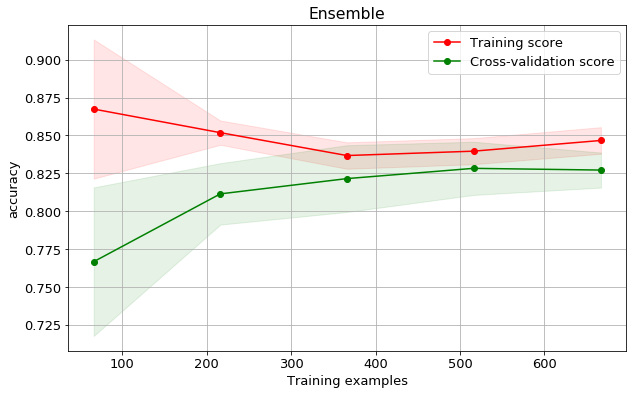

In [233]:
print (accuracy_score(y_test, clf_vc.predict(X_test)))
print (clf_vc)
plt = plot_learning_curve(clf_vc, 'Ensemble', X, y, cv=4)
plt.show()

## Make submission

In [227]:
PassengerId = test.PassengerId
test.drop('PassengerId', axis=1, inplace=True)

In [234]:
def submission(model, fname, X):
    ans = pd.DataFrame(columns=['PassengerId', 'Survived'])
    ans.PassengerId = PassengerId
    ans.Survived = pd.Series(model.predict(X), index=ans.index)
    ans.to_csv(fname, index=False)

In [235]:
submission(clf_vc,'sub.csv', X_test)

ValueError: Wrong number of items passed 223, placement implies 418